In [ ]:
!pip install cartopy
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import xarray as xr
import shapely.geometry as sgeom
import matplotlib

In [28]:
def set_plot_fontsize():
    # from https://matplotlib.org/stable/users/explain/customizing.html
    font = {'weight' : 'normal',
            'size'   : 20}
    plt.rcParams['xtick.major.size'] = 10
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.size'] = 5
    plt.rcParams['xtick.minor.width'] = 0.5
    plt.rcParams['ytick.major.size'] = 10
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.size'] = 5
    plt.rcParams['ytick.minor.width'] = 0.5
    plt.rcParams['axes.labelsize'] =  20
    plt.rcParams['axes.linewidth'] = 0.5
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.grid'] =  False
    plt.rcParams['ytick.minor.visible'] = True
    plt.rcParams['xtick.minor.visible'] = True
    # plt.rcParams['axes.grid.which'] = 'both'
    # plt.rcParams['image.cmap'] = get_panoply_cmap()
    matplotlib.rc('font', **font)
    return

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Atmos_Chem/ATom_Cleaned_Up/was3.csv')

In [31]:
test = df[df.MSL_GPS_Altitude > 10000]

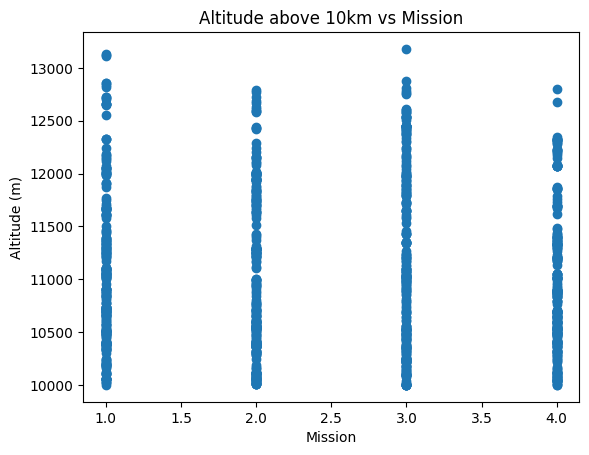

In [32]:
plt.scatter(test.mission, test.MSL_GPS_Altitude)
plt.xlabel('Mission')
plt.ylabel('Altitude (m)')
plt.title('Altitude above 10km vs Mission');

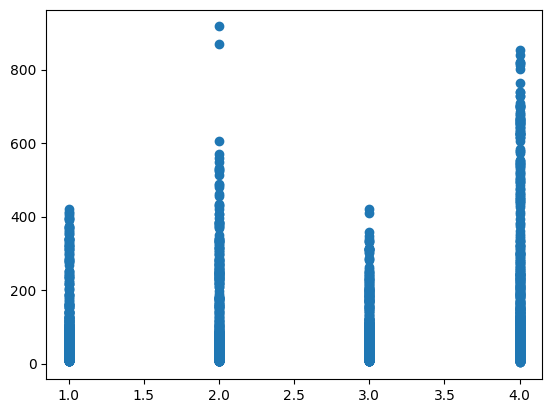

In [33]:
plt.scatter(df.mission, df.O3_CL)

In [ ]:
df.O3_GMI.mean()

63.9918255755144

In [ ]:
# separate out the missions
w1 = df[df.mission == 1]
w2 = df[df.mission == 2]
w3 = df[df.mission == 3]
w4 = df[df.mission == 4]

# remove coordinate columns from buf df to use as data in datasets
w1_buf = w1.drop(['Unnamed: 0',  'UTC_Start', 'UTC_Stop_WAS', 'UTC_Mean_1s', 'lat', 'lon', 'mission'], axis=1)
w2_buf = w2.drop(['Unnamed: 0', 'UTC_Start', 'UTC_Stop_WAS', 'UTC_Mean_1s', 'lat', 'lon', 'mission'], axis=1)
w3_buf = w3.drop(['Unnamed: 0', 'UTC_Start', 'UTC_Stop_WAS', 'UTC_Mean_1s', 'lat', 'lon', 'mission'], axis=1)
w4_buf = w4.drop(['Unnamed: 0','UTC_Start', 'UTC_Stop_WAS', 'UTC_Mean_1s', 'lat', 'lon', 'mission'], axis=1)

# create datasets for each mission
was1 = xr.Dataset(
    data_vars=dict(
      Altitude=(['loc'], w1.MSL_GPS_Altitude),
      CFC11=(['loc'], w1.CFC11_WAS),
      CFC113=(['loc'], w1.CFC113_WAS),
      HCFC22=(['loc'], w1.HCFC22_WAS),
      HCFC141b=(['loc'], w1.HCFC141b_WAS),
      HCFC142b=(['loc'], w1.HCFC142b_WAS),
      C2Cl4=(['loc'], w1.C2Cl4_WAS),
      CH3Cl=(['loc'], w1.CH3Cl_WAS),
      O3_CL=(['loc'], w1.O3_CL)),
    coords=dict(
        lon=("loc", w1.lon), lat=("loc", w1.lat)))

was2 = xr.Dataset(
    data_vars=dict(
      Altitude=(['loc'], w2.MSL_GPS_Altitude),
      CFC11=(['loc'], w2.CFC11_WAS),
      CFC113=(['loc'], w2.CFC113_WAS),
      HCFC22=(['loc'], w2.HCFC22_WAS),
      HCFC141b=(['loc'], w2.HCFC141b_WAS),
      HCFC142b=(['loc'], w2.HCFC142b_WAS),
      C2Cl4=(['loc'], w2.C2Cl4_WAS),
      CH3Cl=(['loc'], w2.CH3Cl_WAS),
      O3_CL=(['loc'], w2.O3_CL)),
    coords=dict(
        lon=("loc", w2.lon), lat=("loc", w2.lat)))

was3 = xr.Dataset(
    data_vars=dict(
      Altitude=(['loc'], w3.MSL_GPS_Altitude),
      CFC11=(['loc'], w3.CFC11_WAS),
      CFC113=(['loc'], w3.CFC113_WAS),
      HCFC22=(['loc'], w3.HCFC22_WAS),
      HCFC141b=(['loc'], w3.HCFC141b_WAS),
      HCFC142b=(['loc'], w3.HCFC142b_WAS),
      C2Cl4=(['loc'], w3.C2Cl4_WAS),
      CH3Cl=(['loc'], w3.CH3Cl_WAS),
      O3_CL=(['loc'], w3.O3_CL)),
    coords=dict(
        lon=("loc", w3.lon), lat=("loc", w3.lat)))

was4 = xr.Dataset(
    data_vars=dict(
      Altitude=(['loc'], w4.MSL_GPS_Altitude),
      CFC11=(['loc'], w4.CFC11_WAS),
      CFC113=(['loc'], w4.CFC113_WAS),
      HCFC22=(['loc'], w4.HCFC22_WAS),
      HCFC141b=(['loc'], w4.HCFC141b_WAS),
      HCFC142b=(['loc'], w4.HCFC142b_WAS),
      C2Cl4=(['loc'], w4.C2Cl4_WAS),
      CH3Cl=(['loc'], w4.CH3Cl_WAS),
      O3_CL=(['loc'], w4.O3_CL)),
    coords=dict(
        lon=("loc", w4.lon), lat=("loc", w4.lat)))

In [ ]:
# low1 = was1.where(was1.Altitude < 2000).dropna(dim='loc')
# mid1 = was1.where((was1.Altitude >= 2000) & (was1.Altitude < 8000)).dropna(dim='loc')
# high1 = was1.where(was1.Altitude >= 12000).dropna(dim='loc')

# low2 = was2.where(was2.Altitude < 2000).dropna(dim='loc')
# mid2 = was2.where((was2.Altitude >= 2000) & (was2.Altitude < 8000)).dropna(dim='loc')
# high2 = was2.where(was2.Altitude >= 12000).dropna(dim='loc')

# low3 = was3.where(was3.Altitude < 2000).dropna(dim='loc')
# mid3 = was3.where((was3.Altitude >= 2000) & (was3.Altitude < 8000)).dropna(dim='loc')
# high3 = was3.where(was3.Altitude >= 12000).dropna(dim='loc')

# low4 = was4.where(was4.Altitude < 2000).dropna(dim='loc')
# mid4 = was4.where((was4.Altitude >= 2000) & (was4.Altitude < 8000)).dropna(dim='loc')
# high4 = was4.where(was4.Altitude >= 12000).dropna(dim='loc')

# low1 = was1.where(was1.Altitude < 2000).dropna(dim='loc')
# high1 = was1.where(was1.Altitude >= 2000).dropna(dim='loc')

# low2 = was2.where(was2.Altitude < 2000).dropna(dim='loc')
# high2 = was2.where(was2.Altitude >= 2000).dropna(dim='loc')

# low3 = was3.where(was3.Altitude < 2000).dropna(dim='loc')
# high3 = was3.where(was3.Altitude >= 2000).dropna(dim='loc')

# low4 = was4.where(was4.Altitude < 2000).dropna(dim='loc')
# high4 = was4.where(was4.Altitude >= 2000).dropna(dim='loc')

low1 = was1.where(was1.Altitude < 8000).dropna(dim='loc')
high1 = was1.where(was1.Altitude >= 8000).dropna(dim='loc')

low2 = was2.where(was2.Altitude < 8000).dropna(dim='loc')
high2 = was2.where(was2.Altitude >= 8000).dropna(dim='loc')

low3 = was3.where(was3.Altitude < 8000).dropna(dim='loc')
high3 = was3.where(was3.Altitude >= 8000).dropna(dim='loc')

low4 = was4.where(was4.Altitude < 8000).dropna(dim='loc')
high4 = was4.where(was4.Altitude >= 8000).dropna(dim='loc')

In [ ]:
missions = {1: 'Jul-Aug 2016',
            2: 'Jan-Feb 2017',
            3: 'Sep-Oct 2017',
            4: 'Apr-May 2018'}

In [ ]:
# def plot_spat_dis(species, l, m, h, vmin, vmax, num):
#   fig, ax = plt.subplots(3, 1, figsize=(10, 16), subplot_kw=dict(projection=ccrs.PlateCarree()))

#   # 0-2km
#   ax[0].coastlines()
#   ax[0].gridlines()
#   sc = ax[0].scatter(l.lon, l.lat, c=l[species], marker='s', alpha=0.7,
#                      transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
#   cbar = plt.colorbar(sc, ax=ax[0], orientation='horizontal', pad=0.05)
#   cbar.set_label('Concentration of '+ species + ' (ppt)')
#   dx = (vmax - vmin) / 5
#   cbar.set_ticks([vmin, vmin+dx, vmin+2*dx, vmin+3*dx, vmin+4*dx, vmax])
#   cbar.set_ticklabels([str(int(vmin)), str(int(vmin+dx)), str(int(vmin+2*dx)), str(int(vmin+3*dx)), str(int(vmin+4*dx)), str(vmax) + '+'])
#   ax[0].set_title('Altitude: 0 to 2km')

#   # 2-8km
#   ax[1].coastlines()
#   ax[1].gridlines()
#   sc = ax[1].scatter(m.lon, m.lat, c=m[species], marker='s', alpha=0.7,
#                      transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
#   cbar = plt.colorbar(sc, ax=ax[1], orientation='horizontal', pad=0.05)
#   cbar.set_label('Concentration of '+ species + ' (ppt)')
#   dx = (vmax - vmin) / 5
#   cbar.set_ticks([vmin, vmin+dx, vmin+2*dx, vmin+3*dx, vmin+4*dx, vmax])
#   cbar.set_ticklabels([str(int(vmin)), str(int(vmin+dx)), str(int(vmin+2*dx)), str(int(vmin+3*dx)), str(int(vmin+4*dx)), str(vmax) + '+'])
#   ax[1].set_title('Altitude: 2 to 8km')

#   # 8+km
#   ax[2].coastlines()
#   ax[2].gridlines()
#   sc = ax[2].scatter(h.lon, h.lat, c=h[species], marker='s', alpha=0.7,
#                      transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
#   cbar = plt.colorbar(sc, ax=ax[2], orientation='horizontal', pad=0.05)
#   cbar.set_label('Concentration of '+ species + ' (ppt)')
#   ax[2].set_title('Altitude: 8 to 13km');
#   ax[2].set_extent([-180, 180, -90, 90])
#   dx = (vmax - vmin) / 5
#   cbar.set_ticks([vmin, vmin+dx, vmin+2*dx, vmin+3*dx, vmin+4*dx, vmax])
#   cbar.set_ticklabels([str(int(vmin)), str(int(vmin+dx)), str(int(vmin+2*dx)), str(int(vmin+3*dx)), str(int(vmin+4*dx)), str(vmax) + '+'])
#   plt.suptitle(species + ' in ' + missions[num], y=0.92);

In [ ]:
def plot_spat_dis(species, l, h, vmin, vmax, num):
  fig, ax = plt.subplots(2, 1, figsize=(10, 12), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))

  # 1st window
  ax[0].coastlines()
  gl = ax[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
  gl.top_labels = False
  gl.right_labels = False
  sc = ax[0].scatter(l.lon, l.lat, c=l[species], marker='s', alpha=0.7,
                     transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
  ax[0].set_title('Altitude: 0 to 8km', size=15)

  # 3rd window
  ax[1].coastlines()
  gl = ax[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
  gl.top_labels = False
  gl.right_labels = False
  sc = ax[1].scatter(h.lon, h.lat, c=h[species], marker='s', alpha=0.7,
                     transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
  ax[1].set_title('Altitude: 8 to 13km', size=15);

  # color bar
  dx = (vmax - vmin) / 5
  cbar = plt.colorbar(sc, ax=ax[0:2], orientation='vertical', pad=0.05)
  cbar.set_label('Concentration of '+ species + ' (ppt)', size=12)
  cbar.ax.tick_params(labelsize=10)
  cbar.set_ticks([vmin, vmin+dx, vmin+2*dx, vmin+3*dx, vmin+4*dx, vmax])
  cbar.set_ticklabels([str(int(vmin)), str(int(vmin+dx)), str(int(vmin+2*dx)), str(int(vmin+3*dx)), str(int(vmin+4*dx)), str(vmax) + '+'])
  plt.suptitle(species + ' in ' + missions[num], y=0.94, size=18);

In [ ]:
def plot_spat_for_report(species, l, h, vmin, vmax, num):
  fig, ax = plt.subplots(1, 2, figsize=(14, 6), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))

  # 1st window
  ax[0].coastlines()
  gl = ax[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
  gl.top_labels = False
  gl.right_labels = False
  sc = ax[0].scatter(l.lon, l.lat, c=l[species], marker='s', alpha=0.7,
                     transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
  ax[0].set_title('Altitude: 0 to 8km', size=15)

  # 3rd window
  ax[1].coastlines()
  gl = ax[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
  gl.top_labels = False
  gl.right_labels = False
  sc = ax[1].scatter(h.lon, h.lat, c=h[species], marker='s', alpha=0.7,
                     transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
  ax[1].set_title('Altitude: 8 to 13km', size=15);

  # color bar
  # dx = (vmax - vmin) / 5
  cbar = plt.colorbar(sc, ax=ax[0:2], orientation='vertical', pad=0.05)
  cbar.set_label('Concentration of '+ species + ' (ppt)', size=12)
  cbar.ax.tick_params(labelsize=10)
  # cbar.set_ticks([vmin, vmin+dx, vmin+2*dx, vmin+3*dx, vmin+4*dx, vmax])
  # cbar.set_ticklabels([str(int(vmin)), str(int(vmin+dx)), str(int(vmin+2*dx)), str(int(vmin+3*dx)), str(int(vmin+4*dx)), str(vmax) + '+'])

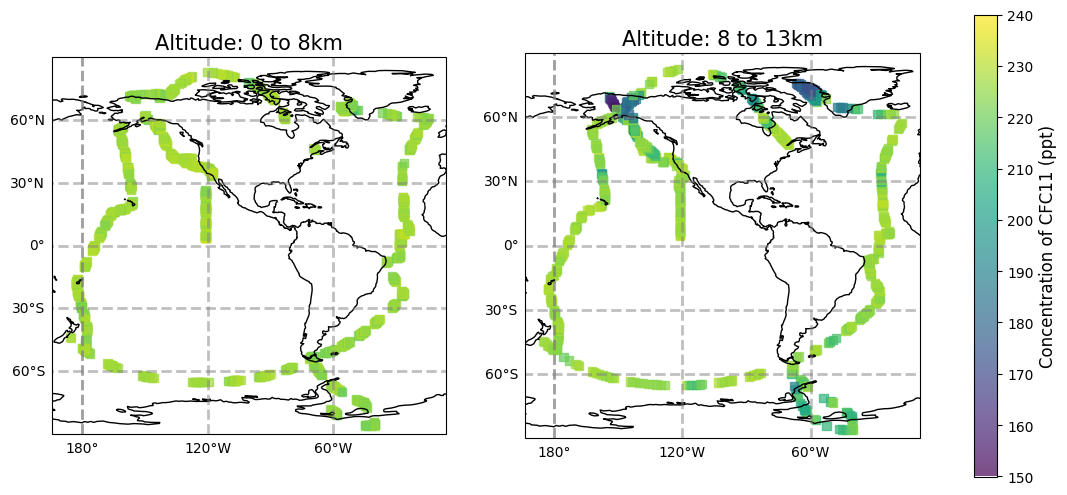

In [ ]:
plot_spat_for_report('CFC11', low4, high4, 150, 240, 4)

In [ ]:
one = was1.where(was1.Altitude >= 10000).dropna(dim='loc')
two = was2.where(was2.Altitude >= 10000).dropna(dim='loc')
three = was3.where(was3.Altitude >= 10000).dropna(dim='loc')
four = was4.where(was4.Altitude >= 10000).dropna(dim='loc')

In [ ]:
def plot_spat_for_each_mission(species, one, two, three, four, vmin, vmax):
  fig, ax = plt.subplots(2, 2, figsize=(18, 12), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=-160)))

  # 1
  ax[0][0].coastlines()
  gl = ax[0][0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
  gl.top_labels = False
  gl.right_labels = False
  sc = ax[0][0].scatter(one.lon, one.lat, c=one[species], marker='s', alpha=0.7,
                     transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
  ax[0][0].set_extent([-190, -10, -90, 90])
  ax[0][0].set_title('Mission 1: Jul-Aug 2016', size=15)

  # 2
  ax[0][1].coastlines()
  gl = ax[0][1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
  gl.top_labels = False
  gl.right_labels = False
  sc = ax[0][1].scatter(two.lon, two.lat, c=two[species], marker='s', alpha=0.7,
                     transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
  ax[0][1].set_extent([-190, -10, -90, 90])
  ax[0][1].set_title('Mission 2: Jan-Feb 2017', size=15);

  # 3
  ax[1][0].coastlines()
  gl = ax[1][0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
  gl.top_labels = False
  gl.right_labels = False
  sc = ax[1][0].scatter(three.lon, three.lat, c=three[species], marker='s', alpha=0.7,
                     transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
  ax[1][0].set_extent([-190, -10, -90, 90])
  ax[1][0].set_title('Mission 3: Sept-Oct 2017', size=15);

  # 4
  ax[1][1].coastlines()
  gl = ax[1][1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
  gl.top_labels = False
  gl.right_labels = False
  sc = ax[1][1].scatter(four.lon, four.lat, c=four[species], marker='s', alpha=0.7,
                     transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
  ax[1][1].set_extent([-190, -10, -90, 90])
  ax[1][1].set_title('Mission 4: Apr-May 2018', size=15);

  # color bar
  dx = (vmax - vmin) / 5
  cbar = plt.colorbar(sc, ax=ax[0:3][0:3], orientation='vertical', pad=0.05)
  cbar.set_label('Concentration of '+ species + ' (ppt)', size=12)
  cbar.ax.tick_params(labelsize=10)
  cbar.set_ticks([vmin, vmin+dx, vmin+2*dx, vmin+3*dx, vmin+4*dx, vmax])
  cbar.set_ticklabels([str(int(vmin)), str(int(vmin+dx)), str(int(vmin+2*dx)), str(int(vmin+3*dx)), str(int(vmin+4*dx)), str(vmax) + '+'])

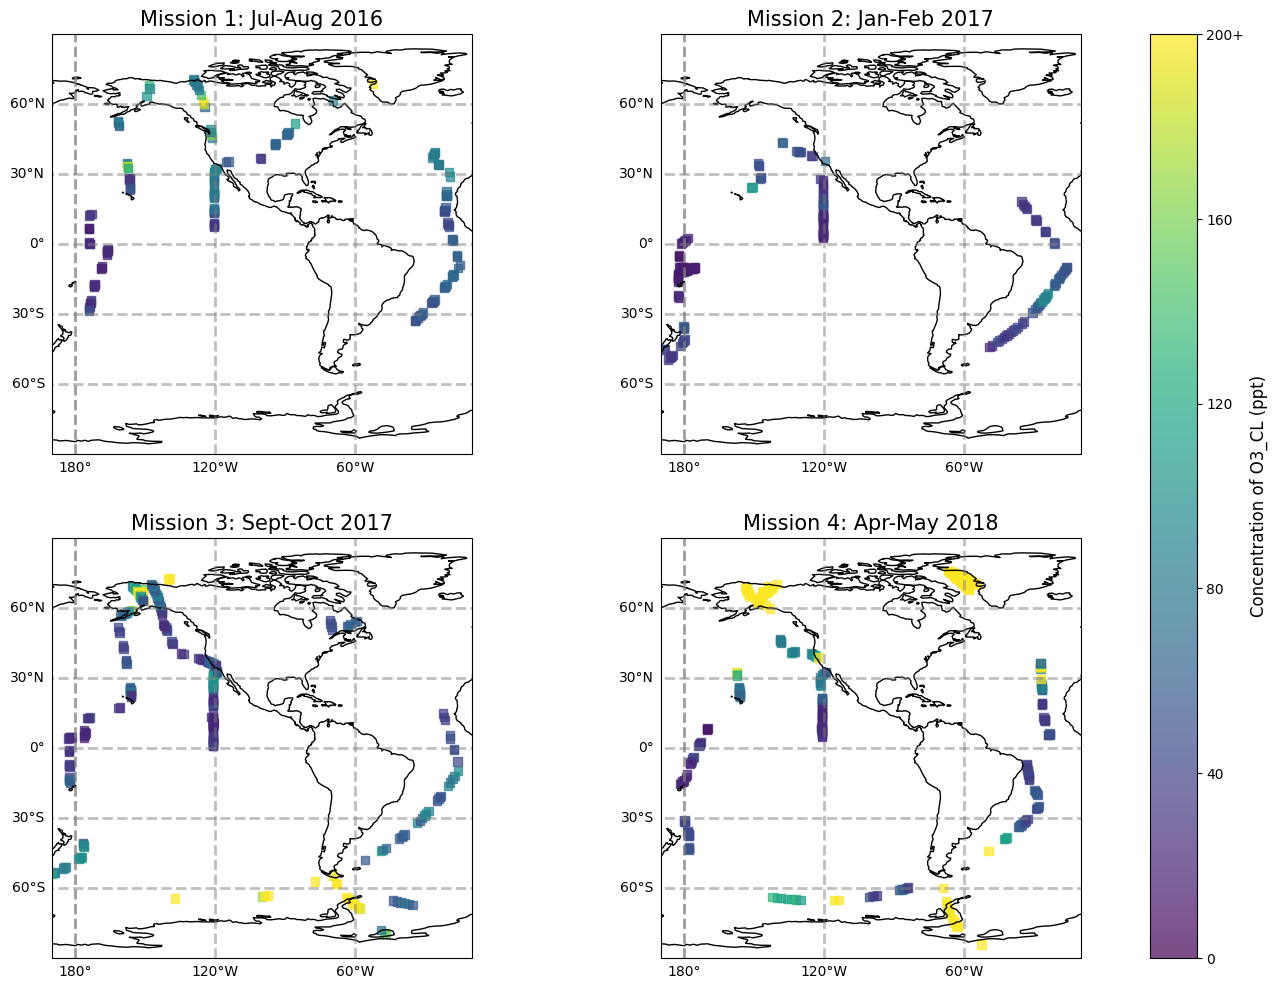

In [ ]:
plot_spat_for_each_mission('O3_CL', one, two, three, four, 0, 200)

In [ ]:
def plot_spat_for_each_mission_r(species, one, two, three, four, vmin, vmax):
  fig, ax = plt.subplots(1, 4, figsize=(18, 12), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=-160)))

  # 1
  ax[0].coastlines()
  gl = ax[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
  gl.top_labels = False
  gl.right_labels = False
  sc = ax[0].scatter(one.lon, one.lat, c=one[species], marker='s', alpha=0.7,
                     transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
  ax[0].set_extent([-190, -10, -90, 90])
  ax[0].set_title('Mission 1: Jul-Aug 2016', size=15)

  # 2
  ax[1].coastlines()
  gl = ax[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
  gl.top_labels = False
  gl.right_labels = False
  sc = ax[1].scatter(two.lon, two.lat, c=two[species], marker='s', alpha=0.7,
                     transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
  ax[1].set_extent([-190, -10, -90, 90])
  ax[1].set_title('Mission 2: Jan-Feb 2017', size=15);

  # 3
  ax[2].coastlines()
  gl = ax[2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
  gl.top_labels = False
  gl.right_labels = False
  sc = ax[2].scatter(three.lon, three.lat, c=three[species], marker='s', alpha=0.7,
                     transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
  ax[2].set_extent([-190, -10, -90, 90])
  ax[2].set_title('Mission 3: Sept-Oct 2017', size=15);

  # 4
  ax[3].coastlines()
  gl = ax[3].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
  gl.top_labels = False
  gl.right_labels = False
  sc = ax[3].scatter(four.lon, four.lat, c=four[species], marker='s', alpha=0.7,
                     transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
  ax[3].set_extent([-190, -10, -90, 90])
  ax[3].set_title('Mission 4: Apr-May 2018', size=15);

  # color bar
  dx = (vmax - vmin) / 5
  cbar = plt.colorbar(sc, ax=ax[0:4], orientation='horizontal', pad=0.05)
  cbar.set_label('Concentration of '+ species + ' (ppt)', size=12)
  cbar.ax.tick_params(labelsize=10)
  cbar.set_ticks([vmin, vmin+dx, vmin+2*dx, vmin+3*dx, vmin+4*dx, vmax])
  cbar.set_ticklabels([str(int(vmin)), str(int(vmin+dx)), str(int(vmin+2*dx)), str(int(vmin+3*dx)), str(int(vmin+4*dx)), str(vmax) + '+'])

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


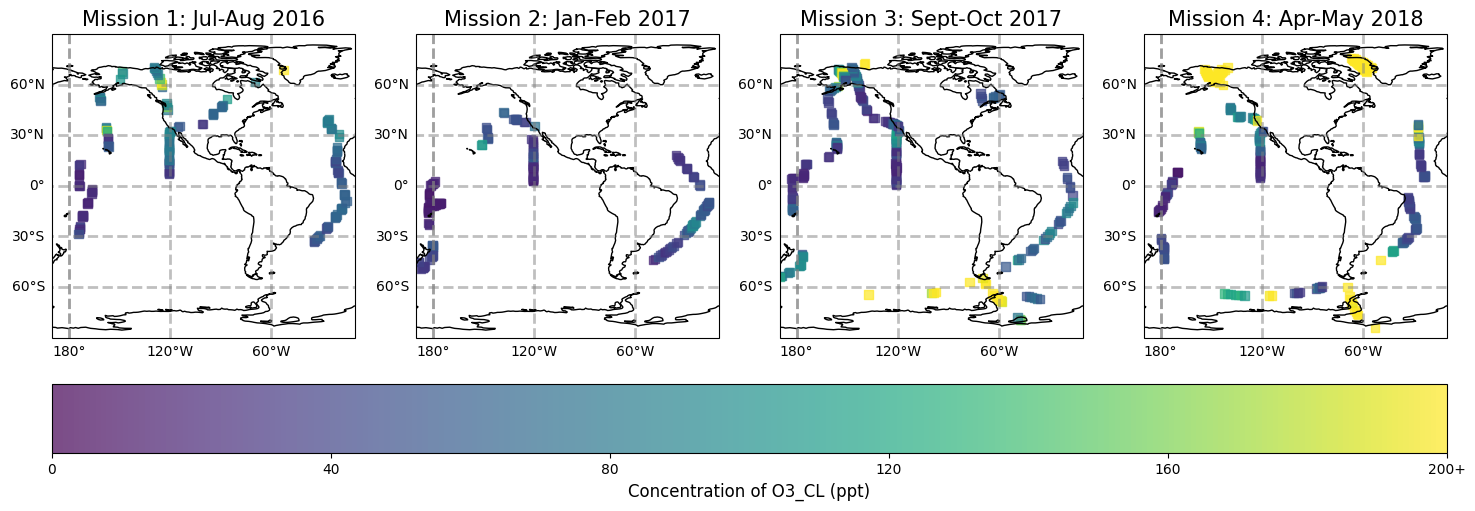

In [ ]:
plot_spat_for_each_mission_r('O3_CL', one, two, three, four, 0, 200)